In [1]:
import sys,os
import pickle
import anndata
import pandas as pd
import numpy as np
import scanpy as sc
import pickle

In [2]:
adata = sc.read_h5ad(open("/nfs/team283/aa16/KR_NAS/data/CR_cells_AnnData_1.h5ad", "rb"))

In [3]:
adata = adata[adata.obs['Pool'] == 'CRcells',:]

In [4]:
adata.obs['Tissue'].value_counts()

Foetal brain (occipital lobe)    20
Foetal brain (temporal lobe)     20
Foetal brain (frontal lobe)      18
Foetal brain (parietal lobe)     16
Name: Tissue, dtype: int64

In [5]:
# adata = adata[[r in ('Foetal brain (occipital lobe)', 'Foetal brain (frontal lobe)') for r in adata.obs['Tissue']],:]

In [6]:
adata.X = adata.layers['X_corrected_cc_cpm']

In [7]:
sc.pp.log1p(adata)

/nfs/team283/aa16/software/miniconda3/envs/ts21/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [8]:
cell_density = pickle.load(open('/nfs/team283/aa16/KR_NAS/CellLocationResults/density_short2.p', 'rb')).T
cell_density

,CR,Dividing,IPC,Neuron,RG,Vascular
DSP-1001250001586-D-A02,0.944541,0.017185,0.003531,0.022706,0.004509,0.007528
DSP-1001250001586-D-A04,0.000472,0.224248,0.119466,0.642660,0.009589,0.003565
DSP-1001250001586-D-A05,0.859566,0.027129,0.004076,0.101147,0.006651,0.001431
DSP-1001250001586-D-A07,0.001162,0.247858,0.114531,0.607650,0.020516,0.008284
DSP-1001250001586-D-A08,0.963426,0.011367,0.003532,0.014520,0.005366,0.001789
...,...,...,...,...,...,...
DSP-1001250001589-E-B05,0.013003,0.228877,0.204711,0.524001,0.007070,0.022338
DSP-1001250001589-E-B06,0.884032,0.043606,0.012995,0.040063,0.018113,0.001191
DSP-1001250001589-E-B08,0.001406,0.323042,0.193324,0.423644,0.031433,0.027151
DSP-1001250001589-E-B09,0.972471,0.008992,0.002378,0.011083,0.004141,0.000933


In [9]:
adata.obs['CR'] = cell_density.loc[adata.obs_names, 'CR ']
adata.obs['IPC'] = cell_density.loc[adata.obs_names, 'IPC ']
adata.obs['Dividing'] = cell_density.loc[adata.obs_names, 'Dividing ']
adata.obs['Neuron'] = cell_density.loc[adata.obs_names, 'Neuron ']
adata.obs['Vascular'] = cell_density.loc[adata.obs_names, 'Vascular ']
adata.obs['RG'] = cell_density.loc[adata.obs_names, 'RG ']

In [10]:
# sc.pp.regress_out(adata, ['IPC', 'Dividing', 'Neuron'])

In [11]:
sc.pp.highly_variable_genes(adata, n_top_genes = 1000)

In [12]:
adata = adata[:, adata.var.highly_variable]

In [13]:
np.shape(adata)

(74, 1000)

In [14]:
sc.pp.scale(adata, max_value=5)

/nfs/team283/aa16/software/miniconda3/envs/ts21/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [15]:
sc.tl.pca(adata, svd_solver='arpack')

In [39]:
import matplotlib
fig, ax = plt.subplots(8,5,figsize = (32,20))

key = 'Tissue'
sc.pl.pca(adata, color=key, components = ['1,2'], ax = ax[0,0], show = False)
sc.pl.pca(adata, color=key, components = ['3,4'], ax = ax[0,1], show = False)
sc.pl.pca(adata, color=key, components = ['5,6'], ax = ax[0,2], show = False)
sc.pl.pca(adata, color=key, components = ['7,8'], ax = ax[0,3], show = False)
sc.pl.pca(adata, color=key, components = ['9,10'], ax = ax[0,4], show = False)
key = 'Donor'
sc.pl.pca(adata, color=key, components = ['1,2'], ax = ax[1,0], show = False)
sc.pl.pca(adata, color=key, components = ['3,4'], ax = ax[1,1], show = False)
sc.pl.pca(adata, color=key, components = ['5,6'], ax = ax[1,2], show = False)
sc.pl.pca(adata, color=key, components = ['7,8'], ax = ax[1,3], show = False)
sc.pl.pca(adata, color=key, components = ['9,10'], ax = ax[1,4], show = False)
key = 'Neuron'
sc.pl.pca(adata, color=key, components = ['1,2'], ax = ax[2,0], show = False)
sc.pl.pca(adata, color=key, components = ['3,4'], ax = ax[2,1], show = False)
sc.pl.pca(adata, color=key, components = ['5,6'], ax = ax[2,2], show = False)
sc.pl.pca(adata, color=key, components = ['7,8'], ax = ax[2,3], show = False)
sc.pl.pca(adata, color=key, components = ['9,10'], ax = ax[2,4], show = False)
key = 'Vascular'
sc.pl.pca(adata, color=key, components = ['1,2'], ax = ax[3,0], show = False)
sc.pl.pca(adata, color=key, components = ['3,4'], ax = ax[3,1], show = False)
sc.pl.pca(adata, color=key, components = ['5,6'], ax = ax[3,2], show = False)
sc.pl.pca(adata, color=key, components = ['7,8'], ax = ax[3,3], show = False)
sc.pl.pca(adata, color=key, components = ['9,10'], ax = ax[3,4], show = False)
key = 'IPC'
sc.pl.pca(adata, color=key, components = ['1,2'], ax = ax[4,0], show = False)
sc.pl.pca(adata, color=key, components = ['3,4'], ax = ax[4,1], show = False)
sc.pl.pca(adata, color=key, components = ['5,6'], ax = ax[4,2], show = False)
sc.pl.pca(adata, color=key, components = ['7,8'], ax = ax[4,3], show = False)
sc.pl.pca(adata, color=key, components = ['9,10'], ax = ax[4,4], show = False)
key = 'Dividing'
sc.pl.pca(adata, color=key, components = ['1,2'], ax = ax[5,0], show = False)
sc.pl.pca(adata, color=key, components = ['3,4'], ax = ax[5,1], show = False)
sc.pl.pca(adata, color=key, components = ['5,6'], ax = ax[5,2], show = False)
sc.pl.pca(adata, color=key, components = ['7,8'], ax = ax[5,3], show = False)
sc.pl.pca(adata, color=key, components = ['9,10'], ax = ax[5,4], show = False)
key = 'RG'
sc.pl.pca(adata, color=key, components = ['1,2'], ax = ax[6,0], show = False)
sc.pl.pca(adata, color=key, components = ['3,4'], ax = ax[6,1], show = False)
sc.pl.pca(adata, color=key, components = ['5,6'], ax = ax[6,2], show = False)
sc.pl.pca(adata, color=key, components = ['7,8'], ax = ax[6,3], show = False)
sc.pl.pca(adata, color=key, components = ['9,10'], ax = ax[6,4], show = False)
key = 'CR'
sc.pl.pca(adata, color=key, components = ['1,2'], ax = ax[7,0], show = False)
sc.pl.pca(adata, color=key, components = ['3,4'], ax = ax[7,1], show = False)
sc.pl.pca(adata, color=key, components = ['5,6'], ax = ax[7,2], show = False)
sc.pl.pca(adata, color=key, components = ['7,8'], ax = ax[7,3], show = False)
sc.pl.pca(adata, color=key, components = ['9,10'], ax = ax[7,4], show = False)

plt.tight_layout(pad=3.0)
plt.savefig('/nfs/team283/aa16/KR_NAS/0_publication_figures/CR_cells_PCA.pdf')

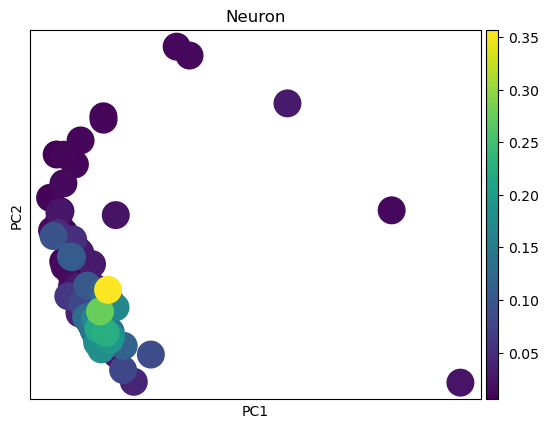

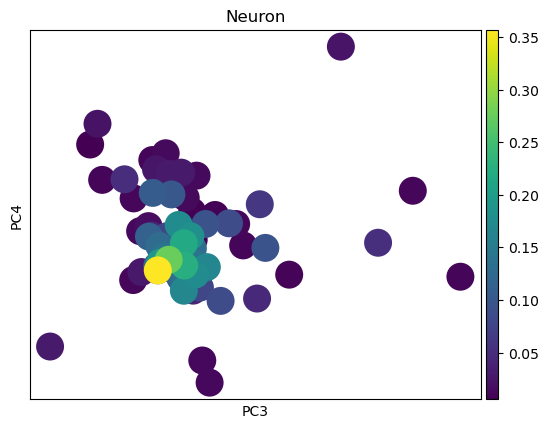

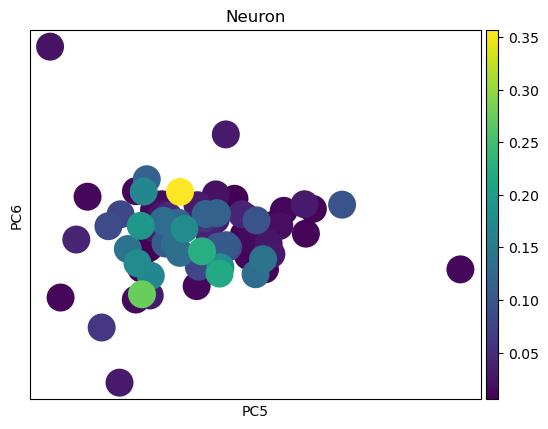

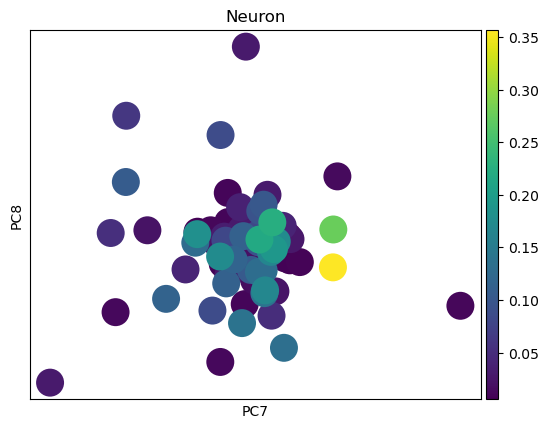

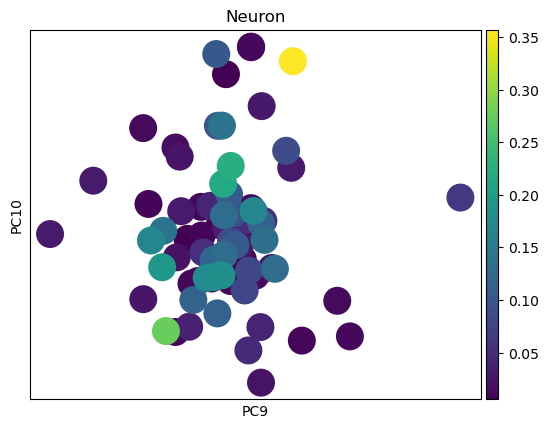

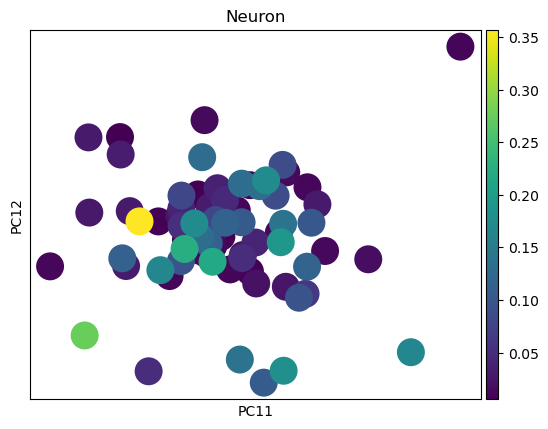

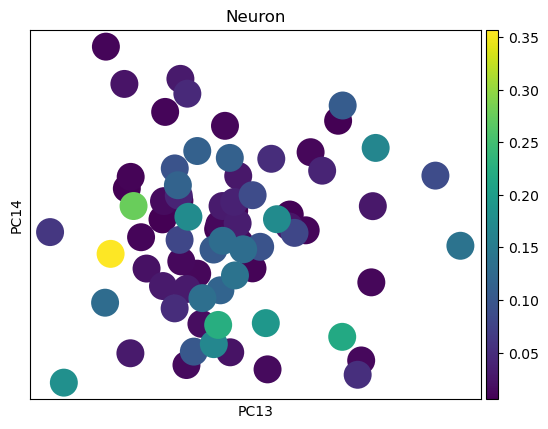

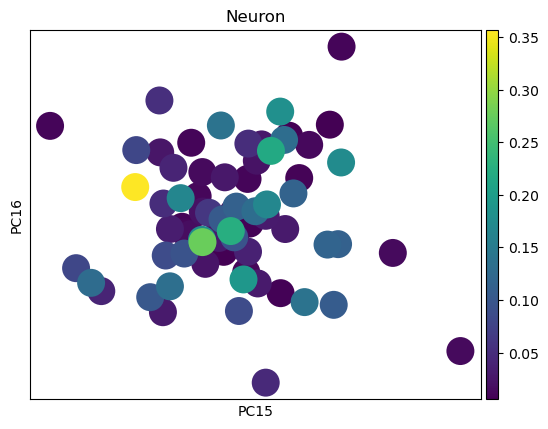

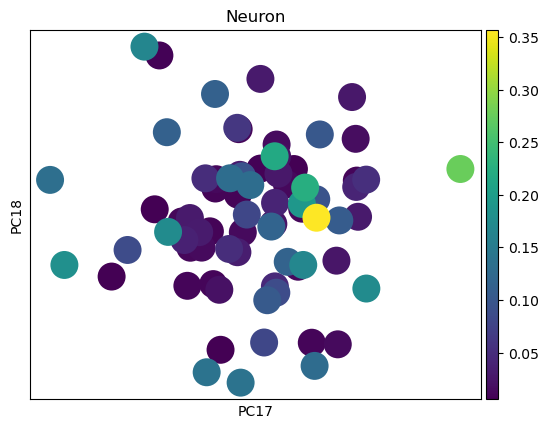

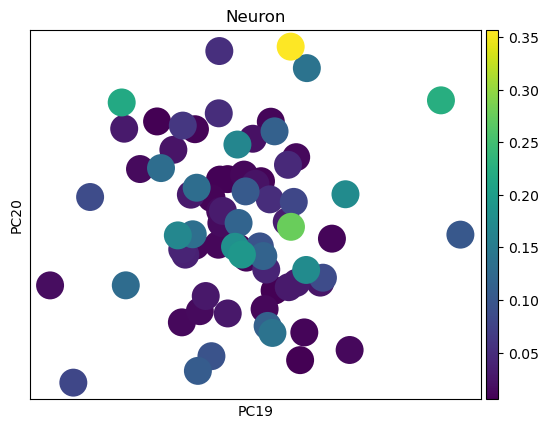

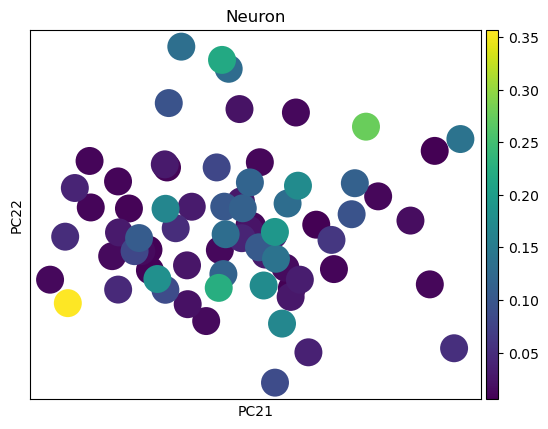

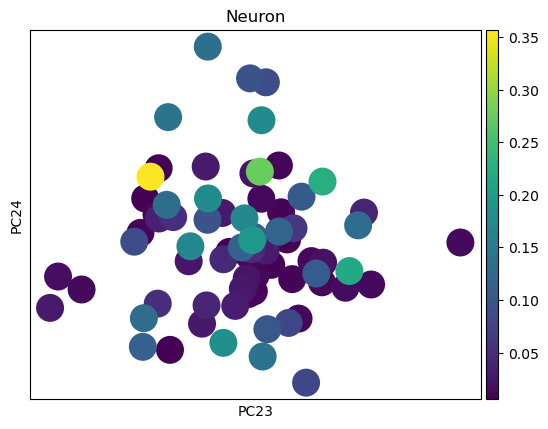

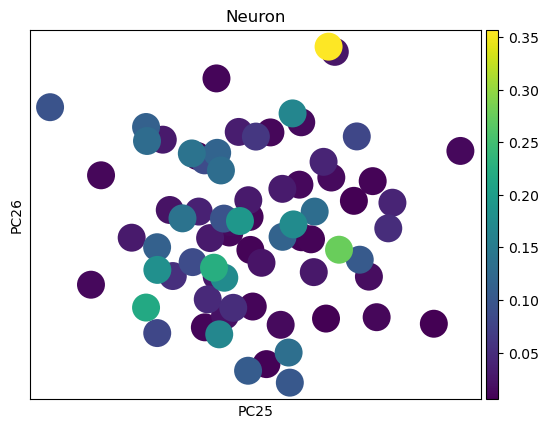

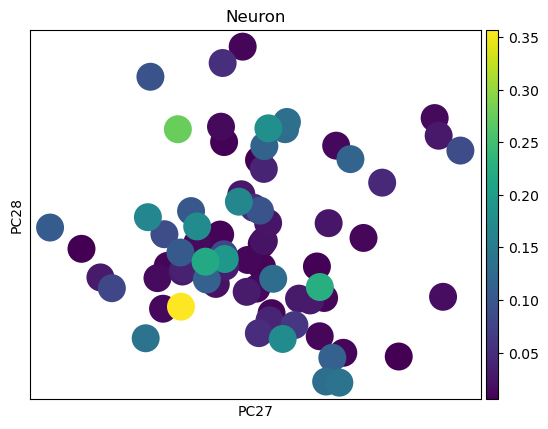

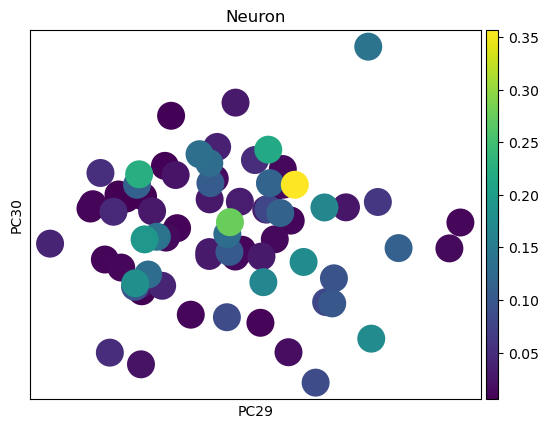

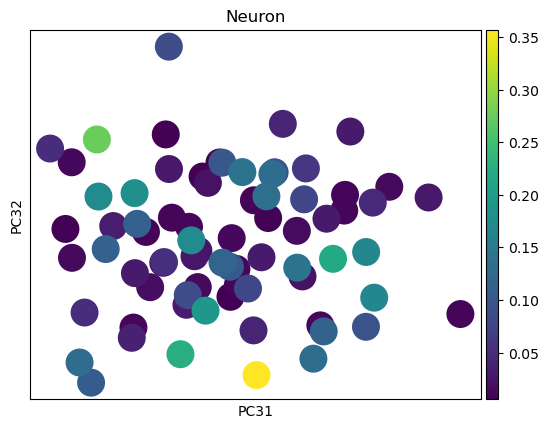

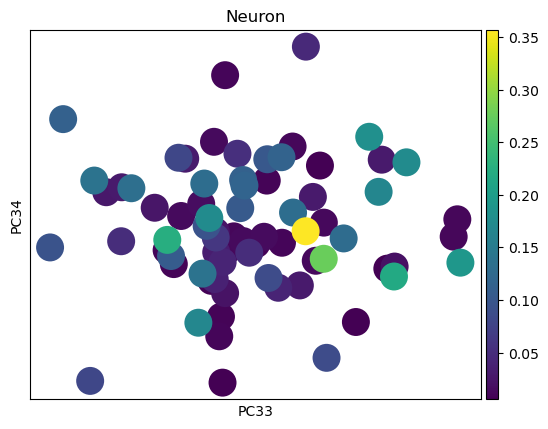

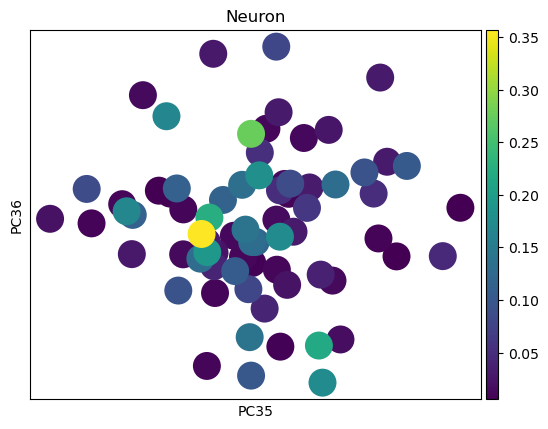

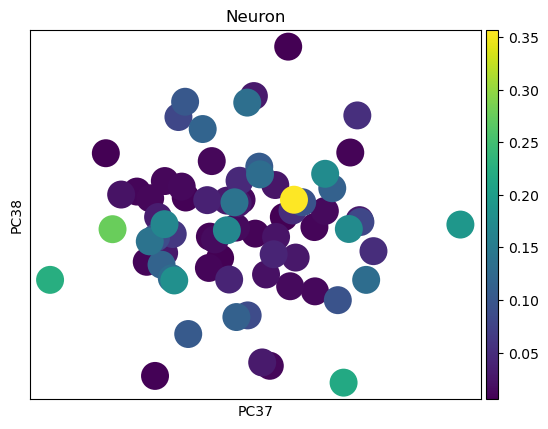

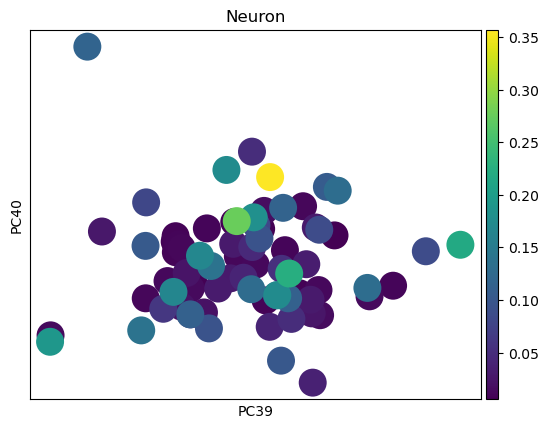

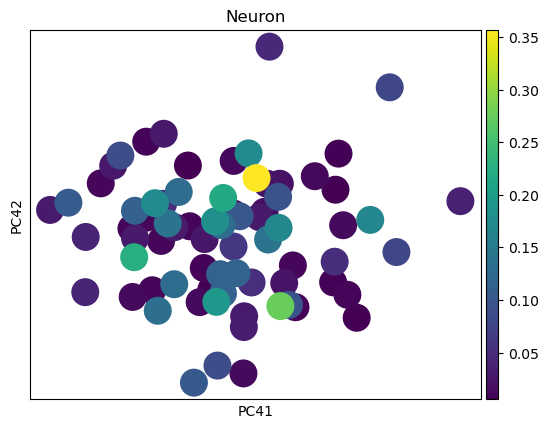

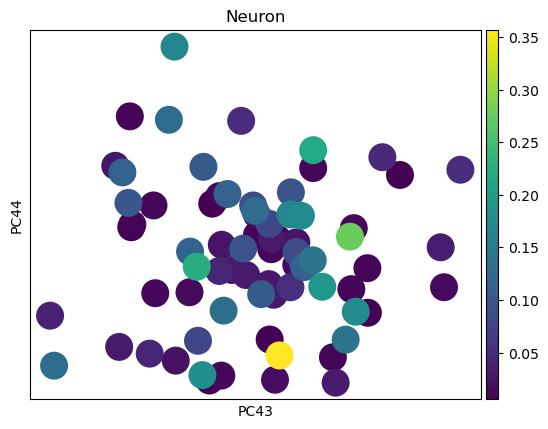

In [17]:
key = 'Neuron'
sc.pl.pca(adata, color=key, components = ['1,2'])
sc.pl.pca(adata, color=key, components = ['3,4'])
sc.pl.pca(adata, color=key, components = ['5,6'])
sc.pl.pca(adata, color=key, components = ['7,8'])
sc.pl.pca(adata, color=key, components = ['9,10'])
sc.pl.pca(adata, color=key, components = ['11,12'])
sc.pl.pca(adata, color=key, components = ['13,14'])
sc.pl.pca(adata, color=key, components = ['15,16'])
sc.pl.pca(adata, color=key, components = ['17,18'])
sc.pl.pca(adata, color=key, components = ['19,20'])
sc.pl.pca(adata, color=key, components = ['21,22'])
sc.pl.pca(adata, color=key, components = ['23,24'])
sc.pl.pca(adata, color=key, components = ['25,26'])
sc.pl.pca(adata, color=key, components = ['27,28'])
sc.pl.pca(adata, color=key, components = ['29,30'])
sc.pl.pca(adata, color=key, components = ['31,32'])
sc.pl.pca(adata, color=key, components = ['33,34'])
sc.pl.pca(adata, color=key, components = ['35,36'])
sc.pl.pca(adata, color=key, components = ['37,38'])
sc.pl.pca(adata, color=key, components = ['39,40'])
sc.pl.pca(adata, color=key, components = ['41,42'])
sc.pl.pca(adata, color=key, components = ['43,44'])

In [18]:
adata.obs['Donor'] = [x.split('-')[0] for x in adata.obs['Sample slide ID']]

/nfs/team283/aa16/software/miniconda3/envs/ts21/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Donor' as categorical


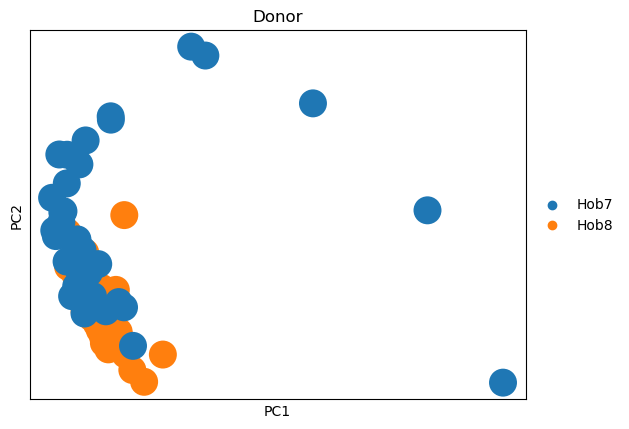

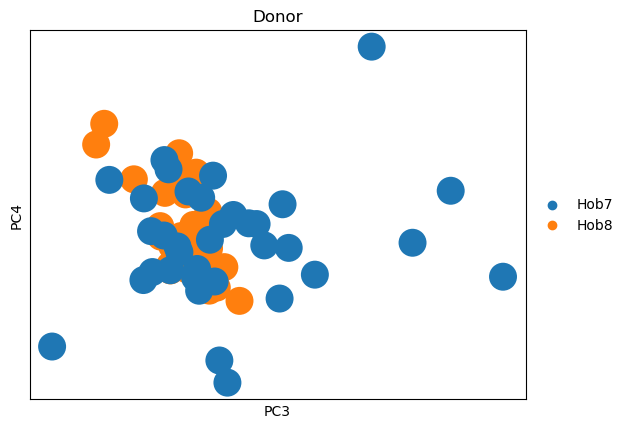

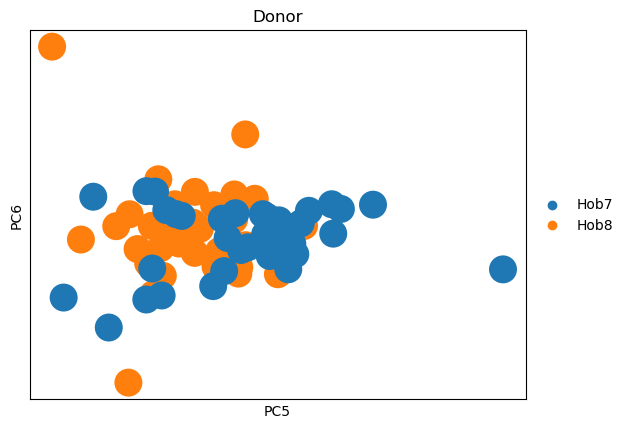

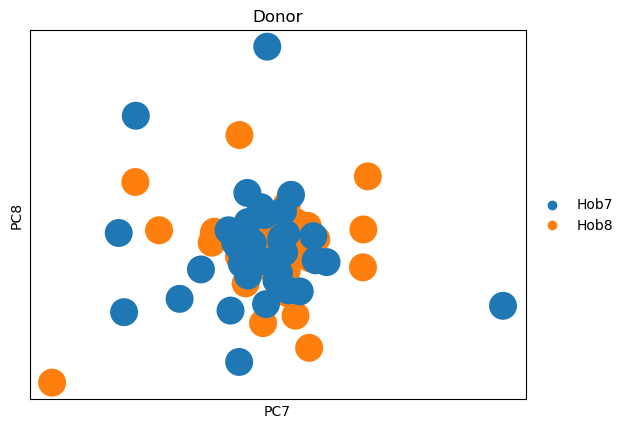

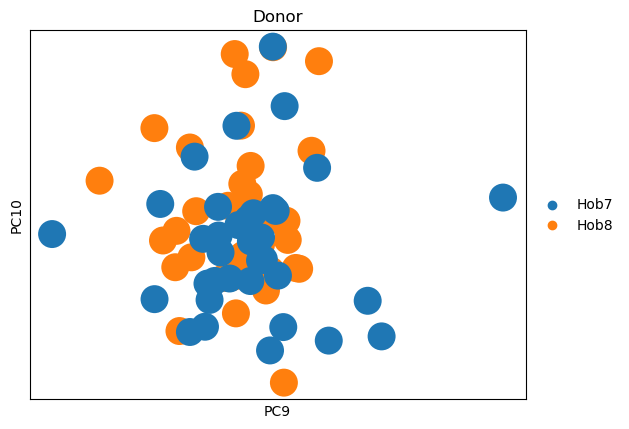

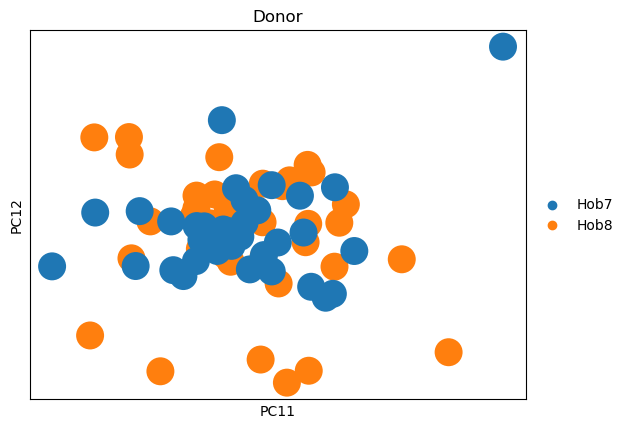

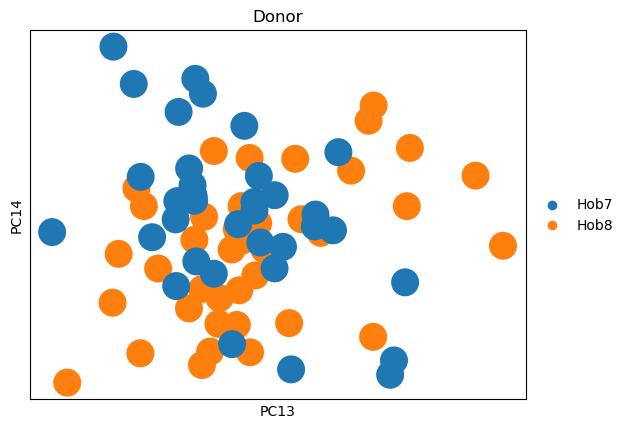

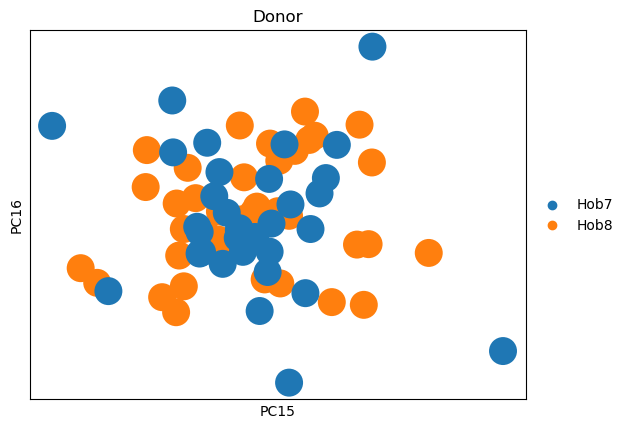

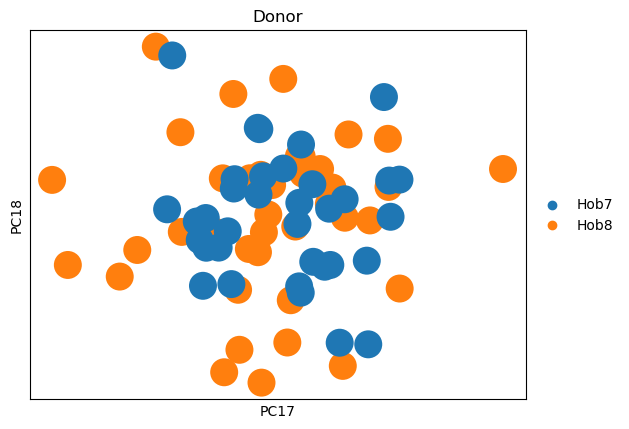

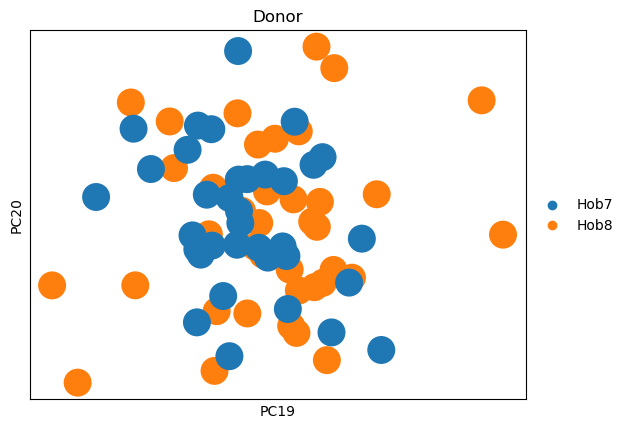

In [19]:
sc.pl.pca(adata, color='Donor', components = ['1,2'])
sc.pl.pca(adata, color='Donor', components = ['3,4'])
sc.pl.pca(adata, color='Donor', components = ['5,6'])
sc.pl.pca(adata, color='Donor', components = ['7,8'])
sc.pl.pca(adata, color='Donor', components = ['9,10'])
sc.pl.pca(adata, color='Donor', components = ['11,12'])
sc.pl.pca(adata, color='Donor', components = ['13,14'])
sc.pl.pca(adata, color='Donor', components = ['15,16'])
sc.pl.pca(adata, color='Donor', components = ['17,18'])
sc.pl.pca(adata, color='Donor', components = ['19,20'])

In [20]:
sc.pp.neighbors(adata, n_neighbors=3, n_pcs=5)

In [21]:
sc.tl.leiden(adata)

In [22]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

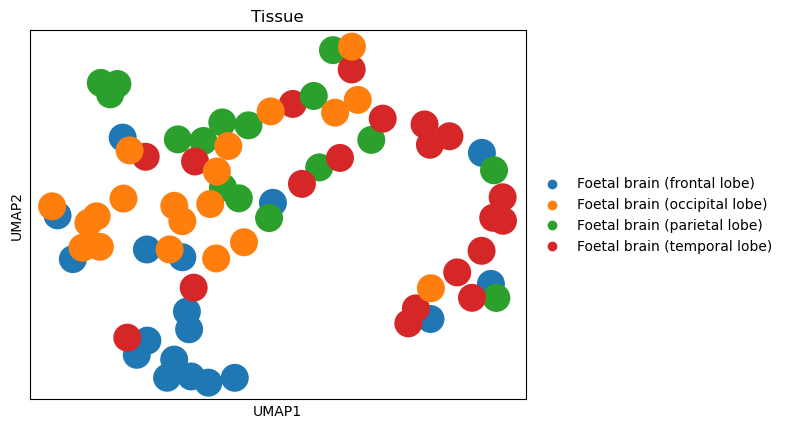

In [23]:
sc.pl.umap(adata, color=['Tissue'])